In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [4]:
df = sns.load_dataset("diamonds")

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
numeric_df = df.select_dtypes(include=[np.number])

In [8]:
numeric_df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


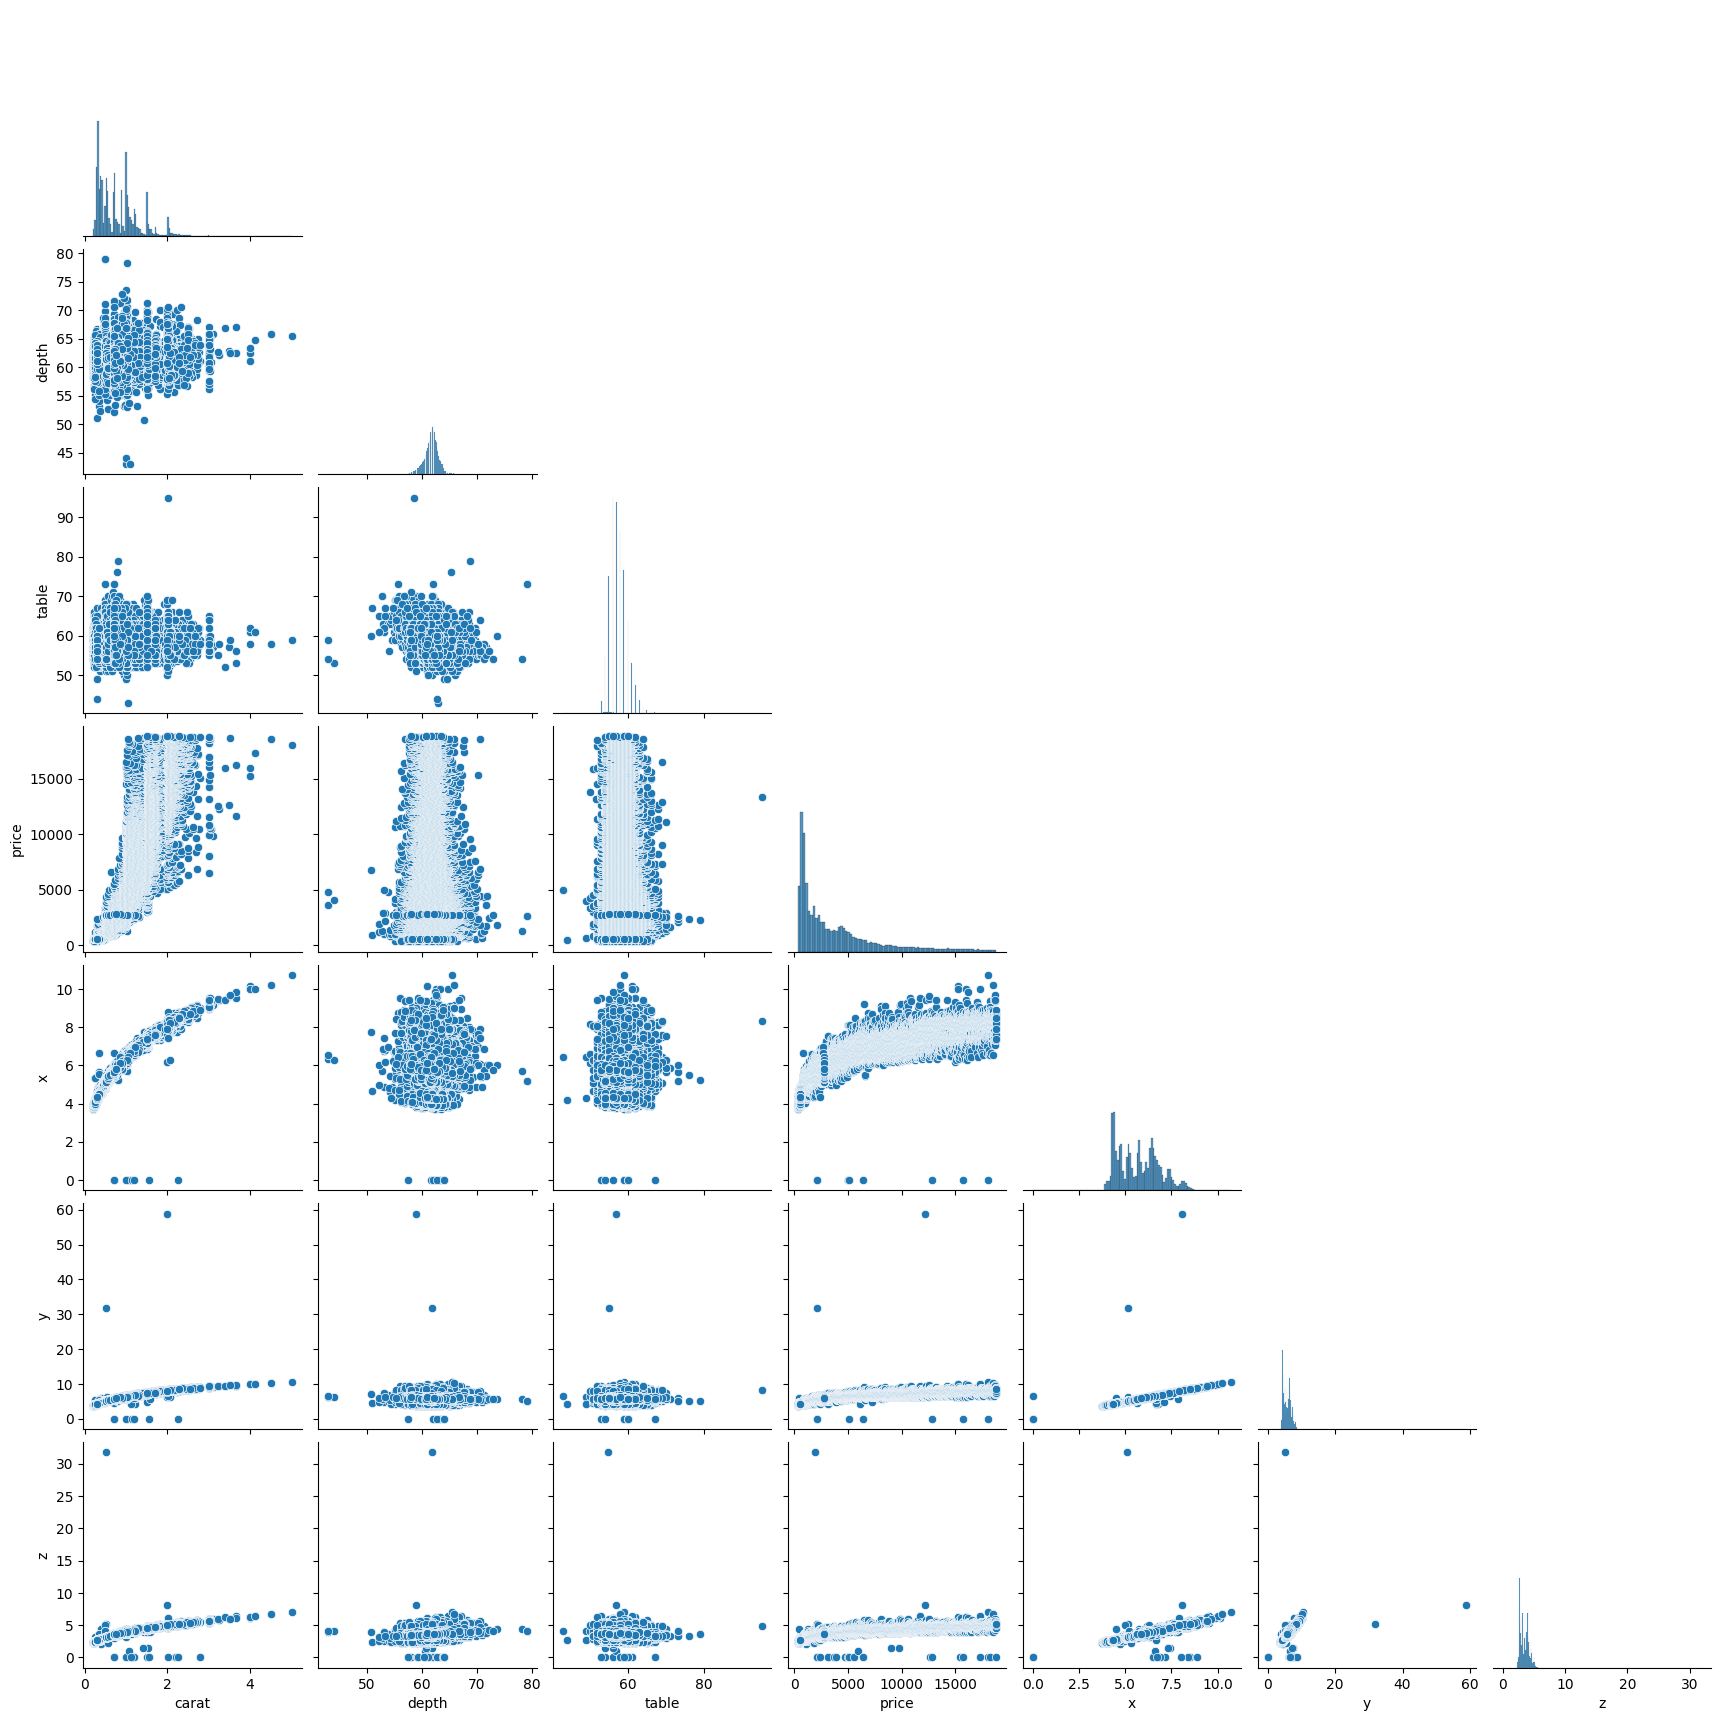

In [10]:
sns.pairplot(data = numeric_df, corner = True)

In [11]:
numeric_df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [28]:
numeric_df = numeric_df.drop(columns=["depth", "table"])

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

In [30]:
pca = PCA(2).fit_transform(X_scaled)

In [31]:
data = pd.DataFrame(pca)

In [32]:
data

,0,1
0,-3.048986,0.522146
1,-3.223831,0.626456
2,-3.049203,0.533152
3,-2.663759,0.317455
4,-2.464227,0.202059
...,...,...
53935,-0.207945,-0.255344
53936,-0.166292,-0.291583
53937,-0.256946,-0.245372
53938,0.382648,-0.531706


In [33]:
data["cut"] = df["cut"]

<Axes: xlabel='0', ylabel='1'>

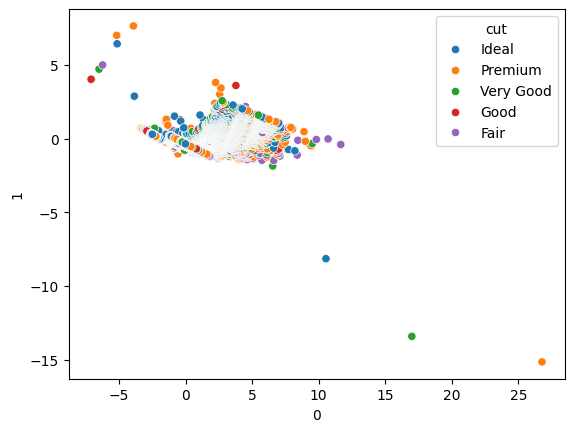

In [34]:
sns.scatterplot(data = data, x = 0, y = 1, hue = "cut")

In [21]:
tsne = TSNE(n_components = 2, max_iter = 250).fit_transform(numeric_df)

In [23]:
data = pd.DataFrame(tsne)

In [24]:
data["cut"] = df["cut"]

<Axes: xlabel='0', ylabel='1'>

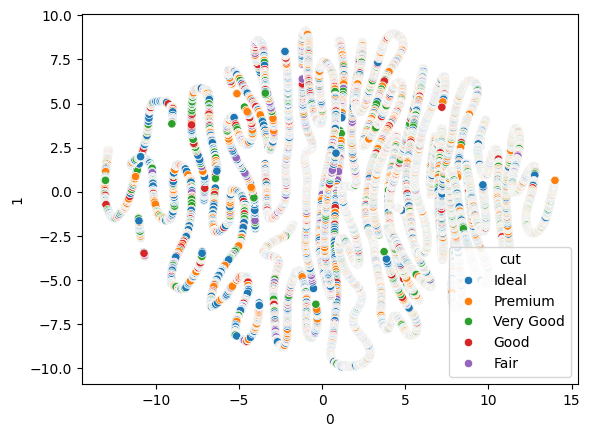

In [27]:
sns.scatterplot(data = data, x = 0, y = 1, hue = "cut")